<a href="https://colab.research.google.com/github/shrikantnarayankar15/Divorce-/blob/master/EDA_relationship_divorce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns

In [0]:
df = pd.read_csv("https://raw.githubusercontent.com/shrikantnarayankar15/Divorce-/master/UKDivorceAndMarriage.csv")

In [216]:
df.head()

,Year,Total Number of Divorces,Husband Submitted Divorce,Wife Submitted Divorce,DRMale 20 to 24,DRMale 25 to 29,DRMale 30 to 34,DRMale 35 to 39,DRMale 40 to 44,DRMale 45 to 49,DRMale 50 to 54,DRMale 55 to 59,DRFemale 20 to 24,DRFemale 25 to 29,DRFemale 30 to 34,DRFemale 35 to 39,DRFemale 40 to 44,DRFemale 45 to 49,DRFemale 50 to 54,DRFemale 55 to 59,Husband Submitted - Reason Adultery,Husband Submitted - Reason Unreasonable Behaviour,Wife Submitted - Reason Adultery,Wife Submitted - Reason Unreasonable Behaviour,Total Number of Marriages,First marriage of both parties,One party previously divorced,Both parties previously divorced,Husband - Previously Divorced,Wife - Previously Divorced,Median Age of Single Males Marriage,Median Age of Single Females Marriage,"Persons marrying per 1,000 population of all ages","Men marrying per 1,000 unmarried1 men aged 16 and over","Women marrying per 1,000 unmarried1 women aged 16 and over","Number Men First Time marrying per 1,000 single population aged 16 and over","Number Women First Time marrying per 1,000 single population aged 16 and over","Number Men Re-marrying per 1,000 single population aged 16 and over","Number Women Re-marrying per 1,000 single population aged 16 and over"
0,2016,"106,959","41,669","65,290",9.4,13.2,13.0,13.4,13.6,13.8,10.8,7.8,11.8,12.7,13.9,13.9,13.7,12.9,9.3,5.9,4429.0,15020.0,7543.0,33191.0,NaN,"64,243","19,061","9,292","19,330","18,670",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,"101,055","38,490","62,565",10.5,13.0,11.9,12.6,13.1,12.6,10.1,7.1,11.2,13.3,12.4,12.7,12.9,12.0,8.7,5.1,4475.0,14179.0,7673.0,32636.0,"239,020","59,228","17,806","8,422","17,806","17,231",31.5,29.7,8.3,21.7,19.8,20.7,24.3,25.4,12.5
2,2014,"111,169","41,364","69,803",13.2,13.5,14.0,13.9,14.6,13.7,11.0,7.4,12.1,14.8,14.5,13.8,14.9,12.8,9.4,5.5,5118.0,15630.0,8932.0,36908.0,"247,372","65,375","20,110","9,810","20,386","19,726",31.2,29.5,8.6,23.0,20.9,22.1,25.9,26.2,12.8
3,2013,"114,720","40,635","74,076",14.7,15.9,15.8,16.7,16.7,15.3,12.0,7.8,16.3,16.8,16.2,16.2,16.2,14.0,10.0,5.7,5263.0,15332.0,9907.0,39879.0,"240,854","81,822","21,648","10,627","21,645","21,257",31.1,29.3,8.5,22.5,20.4,21.7,25.6,25.3,12.2
4,2012,"118,140","41,601","76,490",17.5,17.4,17.3,17.9,17.8,15.8,11.9,7.7,17.0,18.7,17.5,17.0,16.8,14.3,9.7,5.7,5675.0,15210.0,10320.0,41248.0,"263,640","83,684","22,791","11,014","22,597","22,222",31.0,29.1,9.3,24.6,22.5,23.9,28.4,27.2,13.4


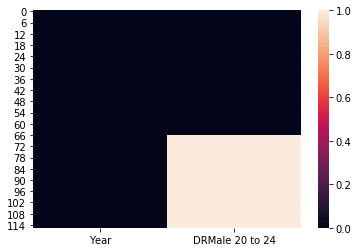

In [217]:
sns.heatmap(df[['Year','DRMale 20 to 24']].isnull())

In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 39 columns):
Year                                                                             116 non-null int64
Total Number of Divorces                                                         116 non-null object
Husband Submitted Divorce                                                        116 non-null object
Wife Submitted Divorce                                                           116 non-null object
DRMale 20 to 24                                                                  67 non-null float64
DRMale 25 to 29                                                                  67 non-null float64
DRMale 30 to 34                                                                  67 non-null float64
DRMale 35 to 39                                                                  67 non-null float64
DRMale 40 to 44                                                                  67 non-

In [0]:
df['Total Number of Divorces']=df['Total Number of Divorces'].str.replace(',','').astype(int)

In [0]:
df['Husband Submitted Divorce']=df['Husband Submitted Divorce'].str.replace(',','').str.replace(':','')

In [0]:
df = df.replace('NaN','0')
df = df.fillna(0)

In [222]:
df['Total Number of Marriages']

0            0
1      239,020
2      247,372
3      240,854
4      263,640
        ...   
111    260,742
112    257,856
113    261,103
114    261,750
115    259,400
Name: Total Number of Marriages, Length: 116, dtype: object

In [0]:
df['Total Number of Marriages']=df['Total Number of Marriages'].str.replace(',','').astype(float)

In [224]:
df[df['Husband Submitted Divorce'].str.contains(':')==True]

,Year,Total Number of Divorces,Husband Submitted Divorce,Wife Submitted Divorce,DRMale 20 to 24,DRMale 25 to 29,DRMale 30 to 34,DRMale 35 to 39,DRMale 40 to 44,DRMale 45 to 49,DRMale 50 to 54,DRMale 55 to 59,DRFemale 20 to 24,DRFemale 25 to 29,DRFemale 30 to 34,DRFemale 35 to 39,DRFemale 40 to 44,DRFemale 45 to 49,DRFemale 50 to 54,DRFemale 55 to 59,Husband Submitted - Reason Adultery,Husband Submitted - Reason Unreasonable Behaviour,Wife Submitted - Reason Adultery,Wife Submitted - Reason Unreasonable Behaviour,Total Number of Marriages,First marriage of both parties,One party previously divorced,Both parties previously divorced,Husband - Previously Divorced,Wife - Previously Divorced,Median Age of Single Males Marriage,Median Age of Single Females Marriage,"Persons marrying per 1,000 population of all ages","Men marrying per 1,000 unmarried1 men aged 16 and over","Women marrying per 1,000 unmarried1 women aged 16 and over","Number Men First Time marrying per 1,000 single population aged 16 and over","Number Women First Time marrying per 1,000 single population aged 16 and over","Number Men Re-marrying per 1,000 single population aged 16 and over","Number Women Re-marrying per 1,000 single population aged 16 and over"


In [225]:
df['Husband Submitted Divorce']

0      41669
1      38490
2      41364
3      40635
4      41601
       ...  
111      332
112      309
113      390
114      361
115      283
Name: Husband Submitted Divorce, Length: 116, dtype: object

In [0]:
df['Husband Submitted Divorce']=df['Husband Submitted Divorce'].str.replace(',','').str.replace(':','')
df['Wife Submitted Divorce']=df['Wife Submitted Divorce'].str.replace(',','').str.replace(':','')

In [0]:
df['Husband Submitted Divorce']=df['Husband Submitted Divorce'].str.replace('','0').astype(int)
df['Wife Submitted Divorce']=df['Wife Submitted Divorce'].str.replace('','0').astype(int)

In [199]:
df['Husband Submitted Divorce'][60:80].astype(int)

60    1010905050
61    1020003040
62    1020402070
63    1030304020
64    1040603090
65    1020805000
66    1050103080
67    1070005030
68             0
69             0
70             0
71             0
72      60602030
73      50205050
74      40000000
75      30203040
76      30502050
77      30802030
78      30106000
79      20209010
Name: Husband Submitted Divorce, dtype: int64

In [0]:
df['Total Number of Marriages']=df['Total Number of Marriages'].str.replace(',','').astype(float)
df['First marriage of both parties']=df['First marriage of both parties'].str.replace(',','').astype(float)
df['One party previously divorced']=df['One party previously divorced'].str.replace(',','').astype(float)
df['Both parties previously divorced']=df['Both parties previously divorced'].str.replace(',','').astype(float)
df['Husband - Previously Divorced']=df['Husband - Previously Divorced'].str.replace(',','').astype(float)
df['Wife - Previously Divorced']=df['Wife - Previously Divorced'].str.replace(',','').astype(float)

In [0]:
df.loc[:,df.columns.str.startswith('DRMale')].columns

Index(['DRMale 20 to 24', 'DRMale 25 to 29', 'DRMale 30 to 34',
       'DRMale 35 to 39', 'DRMale 40 to 44', 'DRMale 45 to 49',
       'DRMale 50 to 54', 'DRMale 55 to 59'],
      dtype='object')

In [0]:
df.columns

Index(['Year', 'Total Number of Divorces', 'Husband Submitted Divorce',
       'Wife Submitted Divorce', 'DRMale 20 to 24', 'DRMale 25 to 29',
       'DRMale 30 to 34', 'DRMale 35 to 39', 'DRMale 40 to 44',
       'DRMale 45 to 49', 'DRMale 50 to 54', 'DRMale 55 to 59',
       'DRFemale 20 to 24', 'DRFemale 25 to 29', 'DRFemale 30 to 34',
       'DRFemale 35 to 39', 'DRFemale 40 to 44', 'DRFemale 45 to 49',
       'DRFemale 50 to 54', 'DRFemale 55 to 59',
       'Husband Submitted - Reason Adultery',
       'Husband Submitted - Reason Unreasonable Behaviour',
       'Wife Submitted - Reason Adultery',
       'Wife Submitted - Reason Unreasonable Behaviour',
       'Total Number of Marriages', 'First marriage of both parties',
       'One party previously divorced', 'Both parties previously divorced',
       'Husband - Previously Divorced', 'Wife - Previously Divorced',
       'Median Age of Single Males Marriage',
       'Median Age of Single Females Marriage',
       'Persons marrying

In [0]:
df.loc[:,df.columns.str.startswith('DRMale')].columns.values

array(['DRMale 20 to 24', 'DRMale 25 to 29', 'DRMale 30 to 34',
       'DRMale 35 to 39', 'DRMale 40 to 44', 'DRMale 45 to 49',
       'DRMale 50 to 54', 'DRMale 55 to 59'], dtype=object)

In [0]:
male_Data=df.loc[:,['DRMale 20 to 24', 'DRMale 25 to 29', 'DRMale 30 to 34',
       'DRMale 35 to 39', 'DRMale 40 to 44', 'DRMale 45 to 49',
       'DRMale 50 to 54', 'DRMale 55 to 59','Year']].melt(id_vars=["Year"], 
        var_name="Date", 
        value_name="Value")

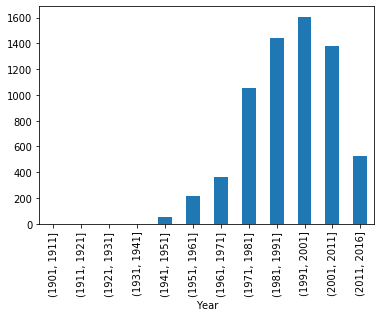

In [0]:
bins = [1901, 1911 , 1921, 1931,1941,1951,1961,1971,1981,1991,2001,2011,2016]

male_Data.groupby([pd.cut(male_Data.Year, bins)])['Value'].sum().plot.bar()

In [0]:
#the data is missgin from 1901 to 1941
#this may be due to the world war
#according to above data most no. of divorce was in the year between 1991-2001

In [7]:
df.loc[:,df.columns.str.startswith('DRFemale')].columns.values

array(['DRFemale 20 to 24', 'DRFemale 25 to 29', 'DRFemale 30 to 34',
       'DRFemale 35 to 39', 'DRFemale 40 to 44', 'DRFemale 45 to 49',
       'DRFemale 50 to 54', 'DRFemale 55 to 59'], dtype=object)

In [0]:
Female_data=df.loc[:,['DRFemale 20 to 24', 'DRFemale 25 to 29', 'DRFemale 30 to 34',
       'DRFemale 35 to 39', 'DRFemale 40 to 44', 'DRFemale 45 to 49',
       'DRFemale 50 to 54', 'DRFemale 55 to 59','Year']].melt(id_vars=["Year"], 
        var_name="Date", 
        value_name="Value")

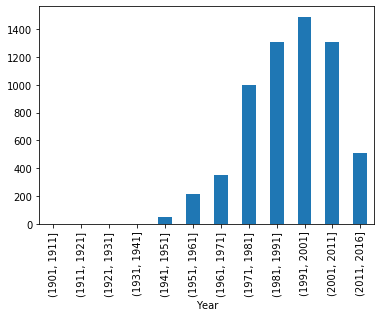

In [11]:
bins = [1901, 1911 , 1921, 1931,1941,1951,1961,1971,1981,1991,2001,2011,2016]

Female_data.groupby([pd.cut(Female_data.Year, bins)])['Value'].sum().plot.bar()

In [0]:
#same for female most no. of divorces happended during this year gap 1991-2001